#### In class, we did linear regression, lasso and ridge regression models on the data provided with polynomial features. Today, we will fit these models on the given data using features inspired by discrete time Fourier series : sinusoids of different frequencies.  

#### Import the necessary libraries and modules here.

In [82]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

#### Import and plot the data from data1.txt . The first column is the input data and the second column is the signal.

In [62]:
data = pd.read_fwf('data1.txt',delimiter = ',', header = None)

In [63]:
data.tail()

,0,1
95,96.0,-5.354413
96,97.0,-4.607652
97,98.0,-1.327695
98,99.0,-1.440373
99,100.0,0.401989


#### Let x be the first column provided in data1.txt . Generate 100 sinusoids as per the following equation.  <br> <br>$$f(k)=sin(2{\pi}*k*x/100) \,\,\,k=1,2,3...100$$ <br><br>These sinuosids are the features that you will now use for training. Plot and visualize a few features.

In [64]:
data_signal = pd.DataFrame()

In [74]:
for i in range(100):
    data_signal[i] = np.sin((2*np.pi*(i+1)*data[0])/100)

In [75]:
data_signal.shape

(100, 100)

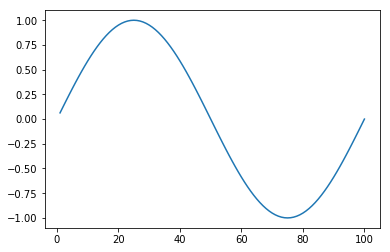

In [81]:
plt.plot(data[0], data_signal[0])

#### Use linear regression without any regularization, lasso and ridge regression models to fit data1.txt . For ridge and lasso, use the optimal tuning parameter found using 5-fold cross validation. Report the coefficient values for each model. Answer the following :  <br> <br> 1. Does the signal in data1.txt contain any dominant frequencies? If yes, identify them. Which model helped you answer this? Give reasons. <br><br>2. Plot the reconstructed signal and the signal in data1.txt using all the three models and compare. Plot separately for each model. <br><br> 

In [71]:
data[1] = data[1]/max(data[1])

In [77]:
linear_model = LinearRegression()
linear_model.fit(data_signal, data[1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

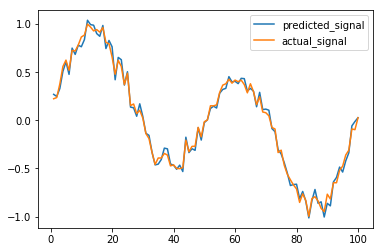

In [78]:
pred_signal = linear_model.predict(data_signal)
plt.plot(data[0], pred_signal, label = 'predicted_signal')
plt.plot(data[0], data[1], label = 'actual_signal')
plt.legend()

In [79]:
coefficients_linear_model = linear_model.coef_

In [80]:
print(sorted(coefficients_linear_model))
print('proportion of the highest coefficient than the least: ')

[-6005104116059.775, -6005104116059.724, -4908406509437.428, -4908406509437.384, -4825263060413.247, -4825263060413.2295, -3198663729047.546, -3198663729047.5317, -3184920619680.8047, -2487045094492.618, -2487045094492.5967, -2447426874189.48, -2447426874189.4795, -2227379138852.8013, -2227379138852.775, -2107618134830.1377, -2107618134830.0942, -1901725820271.7778, -1901725820271.7625, -1803341565715.0957, -1803341565715.0427, -1444992397538.0483, -1444992397537.3901, -1269614239785.2815, -1269614239785.2395, -1147777077492.0398, -1147777077492.037, -1137573790550.127, -1137573790550.1157, -592181169756.0188, -592181169755.99, -355904570295.69244, -355904570295.6575, -182220811823.98315, -182220811823.96936, -62445092869.586426, -62445092869.56464, -36984630085.493286, -36984630085.48718, 45978624373.131775, 45978624373.13367, 87529891021.44934, 87529891021.47852, 88218604285.59064, 88218604285.62183, 323755342097.2827, 323755342097.29254, 343985768110.18726, 343985768110.2344, 347886

In [84]:
ridge_model = Ridge()
params = {'alpha': [0.01,0.1,1,10,100]}
best_ridge = GridSearchCV(ridge_model, params, cv = 5)
best_ridge.fit(data_signal, data[1])

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [86]:
best_ridge.best_params_

{'alpha': 0.01}

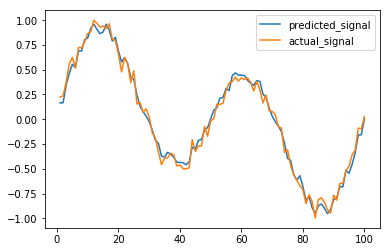

In [92]:
best_ridge2 = Ridge(alpha = 0.01)
best_ridge2.fit(data_signal, data[1])
pred_signal = best_ridge2.predict(data_signal)
plt.plot(data[0], pred_signal, label = 'predicted_signal')
plt.plot(data[0], data[1], label = 'actual_signal')
plt.legend()

In [94]:
sorted(best_ridge2.coef_)

[-0.3349043037411179,
 -0.17283301428377335,
 -0.01094638563492383,
 -0.010069668706902185,
 -0.009959723657538907,
 -0.008483655050037729,
 -0.007472349970175908,
 -0.007460473979103181,
 -0.007405146149798186,
 -0.005992761928577758,
 -0.005587624092690197,
 -0.005564162400536154,
 -0.005209582501017911,
 -0.005060430917637954,
 -0.004835693289086015,
 -0.004012293173974022,
 -0.0035139525636686364,
 -0.003244290837699005,
 -0.0032320194865422098,
 -0.002830679663641703,
 -0.00260245701024829,
 -0.0025127582104768785,
 -0.0023404327131998186,
 -0.0022564569432839705,
 -0.0022009115401531074,
 -0.002074250906670559,
 -0.0016332873534646332,
 -0.0015419270951912275,
 -0.0014713875529222147,
 -0.0013971031643710038,
 -0.0012623707371627296,
 -0.0012049169387954562,
 -0.0011854882175496694,
 -0.0011078900613565523,
 -0.0010625713594997377,
 -0.0010613618862428138,
 -0.001025757858098718,
 -0.0008814674526698176,
 -0.0008706082113439126,
 -0.0007639233492930208,
 -0.00041550349785161427,


In [96]:
lasso_model = Lasso()
params = {'alpha': [0.01,0.1,1,10,100]}
best_lasso = GridSearchCV(lasso_model, params, cv = 5)
best_lasso.fit(data_signal, data[1])

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [97]:
best_lasso.best_params_

{'alpha': 0.01}

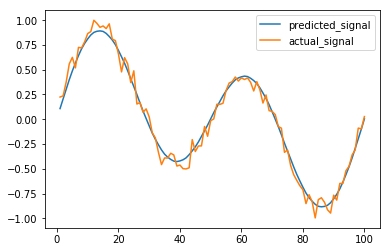

In [98]:
best_lasso2 = Lasso(alpha = 0.01)
best_lasso2.fit(data_signal, data[1])
pred_signal = best_lasso2.predict(data_signal)
plt.plot(data[0], pred_signal, label = 'predicted_signal')
plt.plot(data[0], data[1], label = 'actual_signal')
plt.legend()

In [100]:
sorted(best_lasso2.coef_)

[-0.0001413513479562756,
 -1.0480505352461525e-15,
 -1.9539925233402792e-16,
 -0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 1.865174681370265e-16,
 0.0018949605469035854,
 0.3257005951713545,
 0.6498755883402854]

- Lasso and ridge model were able to identify the dominant frequencies because of the constraints imposed the parameters it was able to filter out only the dominant features which resulted in the signal formation.